0.98935
0.49945
0.486
0.371
0.4906426378849391
0.6579546977616941
0.49291784702549574


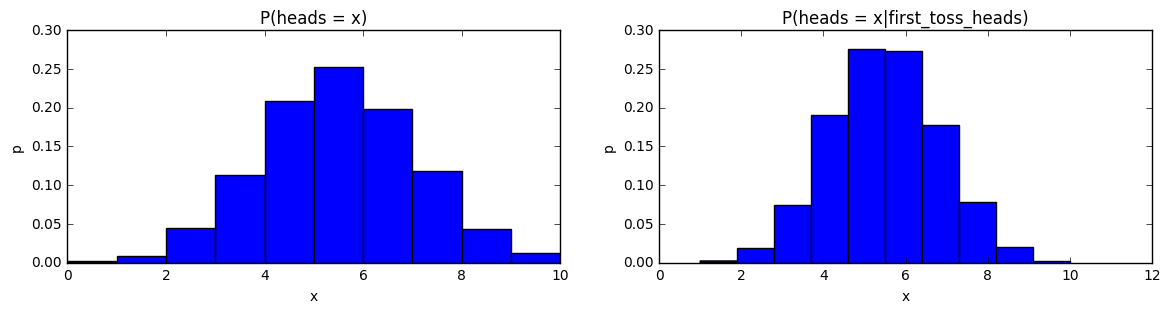

In [1]:
import sample_space
import matplotlib.pyplot as plt

class NCoinTosses(sample_space.Experiment):
    def __init__(self, n, p):
        self.n = n
        self.p = p

    def rerun(self):
        self.tosses = [sample_space.Bern(self.p) for _ in range(self.n)]

    def heads(self):
        return sum(self.tosses)

    def there_are_at_least_two_heads(self):
        return self.heads() >= 2

    def first_toss_heads(self):
        return self.tosses[0]

space = sample_space.SampleSpace(NCoinTosses(10, 0.5), iters=20000)

# ask for probability of any truthy method
print(space.probability_that('there_are_at_least_two_heads'))

# alias for the above, if it's more grammatical
print(space.probability_of('first_toss_heads'))

# change the number of iterations
print(space.probability_of('first_toss_heads', iters=1000))

# ask for probabilities of functions of random variables
def gt(x): return lambda y: y > x
print(space.probability_that(['heads', gt(5)]))

# ask for conditional probabilities
print(space.probability_that(['heads', gt(5)], given=['first_toss_heads']))
print(space.probability_of('first_toss_heads', given=[['heads', gt(5)]]))
print(space.probability_that(['heads', gt(5)],
    given=['first_toss_heads', 'there_are_at_least_two_heads']))

# some plots
fig = plt.figure(figsize=(14,3))

# plot distribution histograms
fig.add_subplot(121)
space.plot_distribution_of('heads') # pass kwargs

# plot conditional distribution histograms
fig.add_subplot(122)
space.plot_distribution_of('heads', given=['first_toss_heads'], bins=10) # can pass kwargs

plt.show()